In [1]:
import tensorflow as tf
from keras.models import Sequential 
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.datasets import mnist
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

(60000, 28, 28)

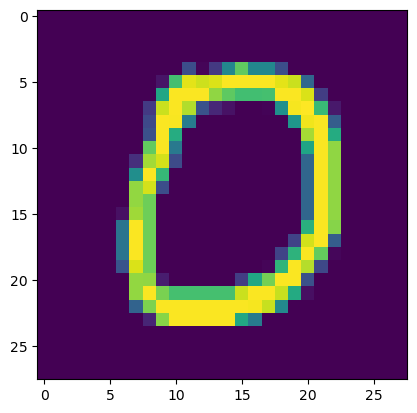

In [85]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
plt.imshow(X_test[10])
X_train.shape

In [86]:
X_test.shape

(10000, 28, 28)

In [87]:
y_train , y_test= to_categorical(y_train), to_categorical(y_test)

In [88]:
model = Sequential()
model.add(Conv2D(64, 3, 1, input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size = 2 ,strides = 2, padding = 'same'))
model.add(Conv2D(32, 3, 1, padding = 'same', use_bias = True))
model.add(MaxPooling2D(pool_size = 2,strides = 1, padding = 'same'))
model.add(Flatten())
model.add(Dense(10, activation = 'softmax'))

In [89]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.build()
model.summary()
model.fit(X_train, y_train, validation_data =(X_test, y_test), epochs = 3 )

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 13, 13, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 13, 13, 32)        18464     
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 flatten_7 (Flatten)         (None, 5408)              0         
                                                                 
 dense_7 (Dense)             (None, 10)              

In [90]:
y_pre_rand = model.predict(X_test[100:105])
y_pre_rand
target = np.argmax(y_pre_rand, axis =1)
print(target)

1/1 [==============================] - 0s 228ms/step
[6 0 5 4 9]


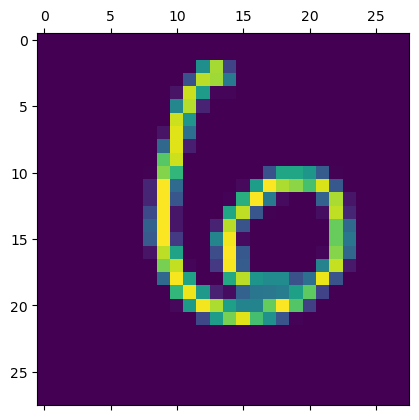

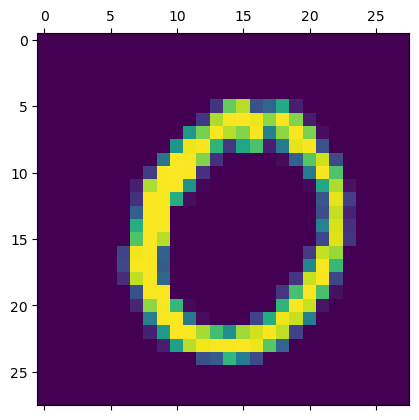

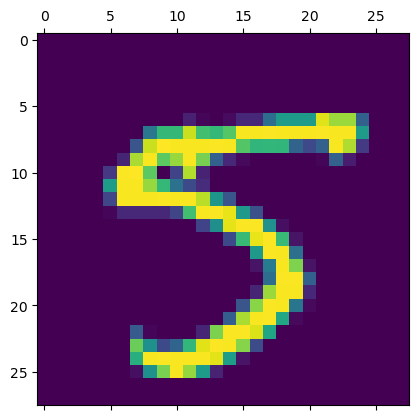

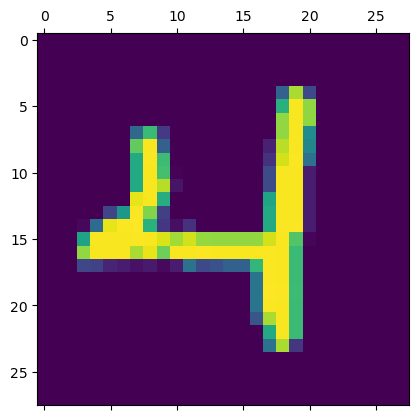

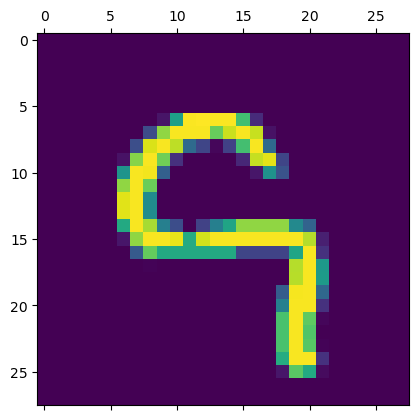

In [91]:
for i in range(100,105):
    plt.matshow(X_test[i])

In [92]:
y_pre = model.predict(X_test)

313/313 [==============================] - 3s 8ms/step


In [74]:
from sklearn.datasets import load_wine
import numpy as np
from sklearn.model_selection import train_test_split
data = load_wine()
A_train, A_test, b_train, b_test = train_test_split(data.data, data.target, test_size = 0.2, random_state = 42)
print(data.data.shape)
print(data.target.shape)

(178, 13)
(178,)


In [66]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier( hidden_layer_sizes=(100,), activation='relu',solver = 'adam')
clf.fit(A_train, b_train)
b_pre = clf.predict(A_test)
# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(b_test, b_pre))

0.9722222222222222


C:\Users\ainzo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.25
